In [48]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

from math import log2
from string import ascii_lowercase

In [2]:
K = 28
L = 6
X = ((K * L * 23) % 20) + 1
Y = ((X + ((K * 5 + L * 7) % 19)) % 20) + 1

In [50]:
def get_probabilities(num):
  # Nacti text ze souboru
  with open("data/" + str(num).zfill(3) + ".txt") as f:
    lines = f.readlines()
    text = lines[1]

  # Spocitej cetnosti jednotlivych
  # symbolu (vcetne mezery)
  frequencies = dict.fromkeys(ascii_lowercase + " ", 0)
  for symbol in text:
    frequencies[symbol] += 1

  # Spocitej pravdepodobnosti jako
  # podil cetnosti daneho znaku
  # a celkoveho poctu znaku
  probabilities = dict.fromkeys(ascii_lowercase + " ", 0)
  for symbol in probabilities.keys():
    probabilities[symbol] = frequencies[symbol] / len(text)

  return frequencies, probabilities

In [51]:
def get_entropy(probabilities):
  entropy = 0
  for probability in probabilities.values():
    entropy += probability * log2(probability)
  return -entropy

In [52]:
def get_codes(probabilities):
  keys = np.array(list(map(set, probabilities.keys())))
  values = np.array(list(probabilities.values()))
  codes = dict.fromkeys(ascii_lowercase + " ", "")

  while len(keys) != 1:
    # Najdi prvni minimum
    first_min_index = np.argmin(values)
    first_min_key = keys[first_min_index]
    first_min_value = values[first_min_index]

    # Smaz prvni minimum
    keys = np.delete(keys, first_min_index)
    values = np.delete(values, first_min_index)

    # Najdi druhe minimum
    second_min_index = np.argmin(values)
    second_min_key = keys[second_min_index]
    second_min_value = values[second_min_index]

    # Sluc prvni minimum s druhym
    keys[second_min_index] = first_min_key.union(second_min_key)
    values[second_min_index] = first_min_value + second_min_value

    # Pridej kladny bit k mene pravdepodobnym symbolum
    for symbol in first_min_key:
      codes[symbol] = "1" + codes[symbol]

    # Pridej zaporny bit k vice pravdepodobnym symbolum
    for symbol in second_min_key:
      codes[symbol] = "0" + codes[symbol]

  return codes

In [53]:
def get_length(probabilities, codes):
  length = 0
  for probability, code in zip(probabilities.values(), codes.values()):
    length += len(code) * probability
  return length

In [55]:
def show_probabilities(probabilities, num):
  x = np.array(list(probabilities.keys()))
  y = np.array(list(probabilities.values()))

  plt.subplots(figsize = (12, 6))
  plt.title("Pravděpodobnosti symbolů (včetně mezery) v textu č. " + str(num), fontweight = "bold", fontsize = 15)
  plt.bar(x, y)
  plt.show()

In [79]:
def show_results_table(frequencies, probabilities, code):
  fig = go.Figure(data = [
    go.Table(
      header = dict(
        align = "center",
        fill_color = "lightgrey",
        font_color = "black",
        font_size = 15,
        height = 30,
        line_color = "black",
        values = [
          "<b>Symbol</b>",
          "<b>Četnost</b>",
          "<b>Pravděpodobnost</b>",
          "<b>Kód</b>"
        ],
      ),
      cells = dict(
        align = "center",
        fill_color = "white",
        font_color = "black",
        font_size = 15,
        height = 30,
        line_color = "black",
        values = [
          list(frequencies.keys()),
          list(frequencies.values()),
          [format(p, ".7f") for p in probabilities.values()],
          list(code.values()),
        ],
      )
    )
  ])
  fig.update_layout(width = 900, height = 1050)
  fig.show()

Entropie:  4.0630295
Střední délka kódu:  4.1070240


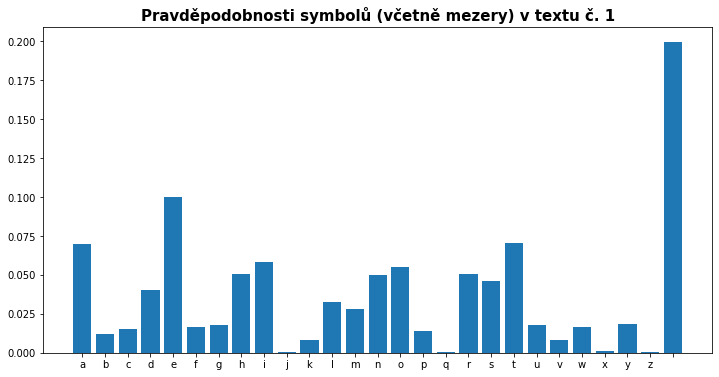

In [80]:
# Ziskej cetnosti a pravdepodobnosti
frequencies_x, probabilities_x = get_probabilities(X)

# Ziskej entropii
entropy_x = get_entropy(probabilities_x)

# Ziskej kody
code_x = get_codes(probabilities_x)

# Ziskej stredni delku kodu
length_x = get_length(probabilities_x, code_x)

print("Entropie: ", format(entropy_x, ".7f"))
print("Střední délka kódu: ", format(length_x, ".7f"))

show_probabilities(probabilities_x, 1)
show_results_table(frequencies_x, probabilities_x, code_x)

Entropie:  4.0777240
Střední délka kódu (pro první kód):  4.1362349
Střední délka kódu (pro druhý kód):  4.1213296


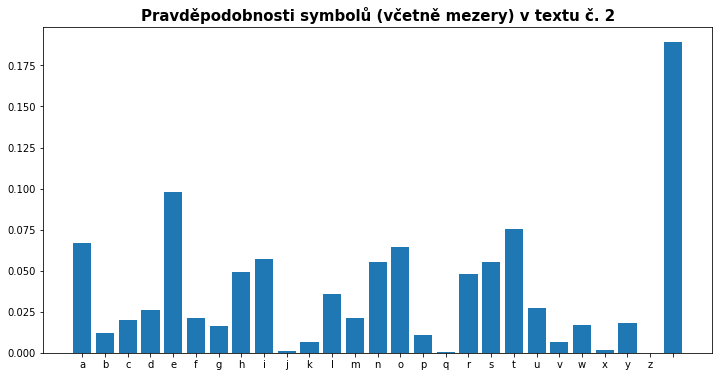

In [85]:
# Ziskej cetnosti a pravdepodobnosti
frequencies_y, probabilities_y = get_probabilities(Y)

# Ziskej entropii
entropy_y = get_entropy(probabilities_y)

# Ziskej kody
code_y = get_codes(probabilities_y)

# Ziskej stredni delku kodu (pro prvni kod)
length_y_x = get_length(probabilities_y, code_x)

# Ziskej stredni delku kodu (pro druhy kod)
length_y_y = get_length(probabilities_y, code_y)

print("Entropie: ", format(entropy_y, ".7f"))
print("Střední délka kódu (pro první kód): ", format(length_y_x, ".7f"))
print("Střední délka kódu (pro druhý kód): ", format(length_y_y, ".7f"))

show_probabilities(probabilities_y, 2)
show_results_table(frequencies_y, probabilities_y, code_y)